## Lable Encoding


In [95]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [96]:
data=pd.read_csv("iris.csv",index_col=0)

In [97]:
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [98]:
#changes does not effect the "data" dataframe
data1=data.copy()

In [99]:
labelencoder=LabelEncoder()
data1.iloc[:,-1]=labelencoder.fit_transform(data1.iloc[:,-1])

In [100]:
data1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2


## One Hot Encoder

### using sklearn

In [101]:
from sklearn.preprocessing import OneHotEncoder

In [102]:
data2= pd.read_csv("iris.csv",index_col=0)

In [103]:
data2

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [104]:
#create enstance of one hot encoder
enc=OneHotEncoder(handle_unknown='ignore')

In [105]:
#passing bridge-types-car-column(label encoded values of bridge type)
enc_df=pd.DataFrame(enc.fit_transform(data2[['Species']]).toarray())

In [106]:
enc_df

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


In [107]:
#merge with main df
data_final = data2.iloc[:,0:4].join(enc_df)
data_final

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,0,1,2
1,5.1,3.5,1.4,0.2,1.0,0.0,0.0
2,4.9,3.0,1.4,0.2,1.0,0.0,0.0
3,4.7,3.2,1.3,0.2,1.0,0.0,0.0
4,4.6,3.1,1.5,0.2,1.0,0.0,0.0
5,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,0.0,0.0,1.0
147,6.3,2.5,5.0,1.9,0.0,0.0,1.0
148,6.5,3.0,5.2,2.0,0.0,0.0,1.0
149,6.2,3.4,5.4,2.3,0.0,0.0,1.0


### using pandas

In [108]:
import pandas as pd

In [109]:
data3=pd.read_csv("iris.csv",index_col=0)

In [110]:
data_encoded=pd.get_dummies(data3)

In [111]:
data_encoded

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica
1,5.1,3.5,1.4,0.2,1,0,0
2,4.9,3.0,1.4,0.2,1,0,0
3,4.7,3.2,1.3,0.2,1,0,0
4,4.6,3.1,1.5,0.2,1,0,0
5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,0,0,1
147,6.3,2.5,5.0,1.9,0,0,1
148,6.5,3.0,5.2,2.0,0,0,1
149,6.2,3.4,5.4,2.3,0,0,1


## Isolation Forest  for outliers

In [112]:
from sklearn.ensemble import IsolationForest

In [113]:
data=pd.read_csv("iris.csv",index_col=0)
data_encoded=pd.get_dummies(data)

In [114]:
clf=IsolationForest(contamination=0.01,random_state=10)
clf.fit(data_encoded)

IsolationForest(contamination=0.01, random_state=10)

In [115]:
y_pred_outliers=clf.predict(data_encoded)

In [116]:
#-1 for outliers and 1 for inliers.
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [117]:
data_encoded

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica
1,5.1,3.5,1.4,0.2,1,0,0
2,4.9,3.0,1.4,0.2,1,0,0
3,4.7,3.2,1.3,0.2,1,0,0
4,4.6,3.1,1.5,0.2,1,0,0
5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,0,0,1
147,6.3,2.5,5.0,1.9,0,0,1
148,6.5,3.0,5.2,2.0,0,0,1
149,6.2,3.4,5.4,2.3,0,0,1


In [118]:
#let us add new data point which is outlier
data_encoded.loc[150]=[20,40,3,50,1,0,0]

In [119]:
data_encoded

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica
1,5.1,3.5,1.4,0.2,1,0,0
2,4.9,3.0,1.4,0.2,1,0,0
3,4.7,3.2,1.3,0.2,1,0,0
4,4.6,3.1,1.5,0.2,1,0,0
5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,0,0,1
147,6.3,2.5,5.0,1.9,0,0,1
148,6.5,3.0,5.2,2.0,0,0,1
149,6.2,3.4,5.4,2.3,0,0,1


In [120]:
#train model
clf=IsolationForest(contamination=0.01,random_state=44)
clf.fit(data_encoded)
#predictions
y_pred_outliers=clf.predict(data_encoded)
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1])

In [121]:
data_encoded['scores']=clf.decision_function(data_encoded)

In [122]:
data_encoded['anomaly']=clf.predict(data_encoded.iloc[:,0:7])

In [123]:
data_encoded

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica,scores,anomaly
1,5.1,3.5,1.4,0.2,1,0,0,0.197354,1
2,4.9,3.0,1.4,0.2,1,0,0,0.171881,1
3,4.7,3.2,1.3,0.2,1,0,0,0.168343,1
4,4.6,3.1,1.5,0.2,1,0,0,0.164369,1
5,5.0,3.6,1.4,0.2,1,0,0,0.194566,1
...,...,...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,0,0,1,0.160329,1
147,6.3,2.5,5.0,1.9,0,0,1,0.141084,1
148,6.5,3.0,5.2,2.0,0,0,1,0.172041,1
149,6.2,3.4,5.4,2.3,0,0,1,0.131144,1


In [124]:
data_encoded[data_encoded['anomaly']==-1]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species_setosa,Species_versicolor,Species_virginica,scores,anomaly
107,4.9,2.5,4.5,1.7,0,0,1,-0.005059,-1
150,20.0,40.0,3.0,50.0,1,0,0,-0.269935,-1


## PPS

In [127]:
# install the package
! pip install ppscore

  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13055 sha256=10e89f755299ffb41512426281e1c9f8b4d8306b257f6dc6924be0366700e53a
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\fb\0e\65\da65ce669381fc01b6ef990d301d3586991f89bff1175877a4
Successfully built ppscore


In [128]:
import ppscore as pps

In [129]:
#Based on the dataframe we can calculate the PPS of x predicting y:
pps.score(data, "Sepal.Length", "Petal.Length")


{'x': 'Sepal.Length',
 'y': 'Petal.Length',
 'ppscore': 0.550422595049248,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 1.4886666666666668,
 'model_score': 0.6692708968366863,
 'model': DecisionTreeRegressor()}

In [130]:
#calculate the whole PPS matrix
pps.matrix(data)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Sepal.Length,Sepal.Length,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Sepal.Length,Sepal.Width,0.000000,regression,True,mean absolute error,0.330667,0.364704,DecisionTreeRegressor()
2,Sepal.Length,Petal.Length,0.550423,regression,True,mean absolute error,1.488667,0.669271,DecisionTreeRegressor()
3,Sepal.Length,Petal.Width,0.431739,regression,True,mean absolute error,0.644667,0.366339,DecisionTreeRegressor()
4,Sepal.Length,Species,0.471649,classification,True,weighted F1,0.353333,0.658333,DecisionTreeClassifier()
5,Sepal.Width,Sepal.Length,0.006966,regression,True,mean absolute error,0.684667,0.679897,DecisionTreeRegressor()
6,Sepal.Width,Sepal.Width,1.000000,predict_itself,True,None,0.000000,1.000000,None
7,Sepal.Width,Petal.Length,0.172375,regression,True,mean absolute error,1.488667,1.232058,DecisionTreeRegressor()
8,Sepal.Width,Petal.Width,0.132858,regression,True,mean absolute error,0.644667,0.559017,DecisionTreeRegressor()
9,Sepal.Width,Species,0.156915,classification,True,weighted F1,0.353333,0.454805,DecisionTreeClassifier()


In [131]:
pps.score(data,"Sepal.Length","Species") #Based on the dataframe we can calculate the PPS of x predicting y

{'x': 'Sepal.Length',
 'y': 'Species',
 'ppscore': 0.47164941668027915,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.35333333333333333,
 'model_score': 0.6583332894532472,
 'model': DecisionTreeClassifier()}

In [133]:
pps.predictors(data,"Species") #We can calculate the PPS of all the predictors in the dataframe against a target y

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Petal.Width,Species,0.927652,classification,True,weighted F1,0.353333,0.953215,DecisionTreeClassifier()
1,Petal.Length,Species,0.884812,classification,True,weighted F1,0.353333,0.925512,DecisionTreeClassifier()
2,Sepal.Length,Species,0.471649,classification,True,weighted F1,0.353333,0.658333,DecisionTreeClassifier()
3,Sepal.Width,Species,0.156915,classification,True,weighted F1,0.353333,0.454805,DecisionTreeClassifier()


<AxesSubplot:xlabel='x', ylabel='ppscore'>

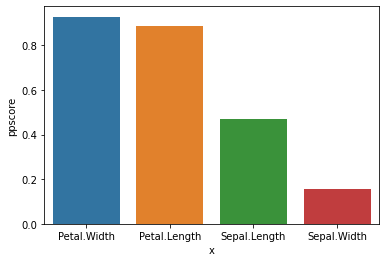

In [137]:
#Visualization of the results
import seaborn as sns
predictors_df = pps.predictors(data, y="Species")
sns.barplot(data=predictors_df, x="x", y="ppscore")

In [135]:
pps.matrix(data)  #Here is how we can calculate the PPS matrix between all columns

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Sepal.Length,Sepal.Length,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Sepal.Length,Sepal.Width,0.000000,regression,True,mean absolute error,0.330667,0.364704,DecisionTreeRegressor()
2,Sepal.Length,Petal.Length,0.550423,regression,True,mean absolute error,1.488667,0.669271,DecisionTreeRegressor()
3,Sepal.Length,Petal.Width,0.431739,regression,True,mean absolute error,0.644667,0.366339,DecisionTreeRegressor()
4,Sepal.Length,Species,0.471649,classification,True,weighted F1,0.353333,0.658333,DecisionTreeClassifier()
5,Sepal.Width,Sepal.Length,0.006966,regression,True,mean absolute error,0.684667,0.679897,DecisionTreeRegressor()
6,Sepal.Width,Sepal.Width,1.000000,predict_itself,True,None,0.000000,1.000000,None
7,Sepal.Width,Petal.Length,0.172375,regression,True,mean absolute error,1.488667,1.232058,DecisionTreeRegressor()
8,Sepal.Width,Petal.Width,0.132858,regression,True,mean absolute error,0.644667,0.559017,DecisionTreeRegressor()
9,Sepal.Width,Species,0.156915,classification,True,weighted F1,0.353333,0.454805,DecisionTreeClassifier()


<AxesSubplot:xlabel='x', ylabel='y'>

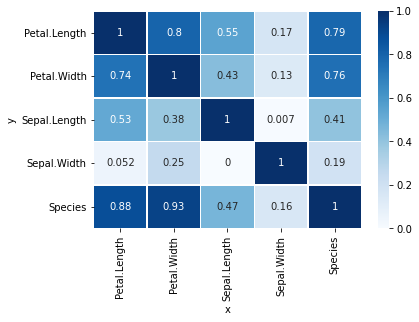

In [139]:
#Plotting the PPS matrix:(This needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data)
matrix_df = pps.matrix(data)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)